In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")

In [2]:
rawData = pd.read_csv('Car details v3.csv')

### Data Cleaning

In [3]:
rawData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


columns **max_power**, **mileage**, **engine** and **torque** contains string characters which need to be cleaned.

In [4]:
rawData['max_power'] = rawData['max_power'].str.extract(r'(\d+\.*\d*)').astype(float)
rawData['mileage'] = rawData['mileage'].str.extract(r'(\d+\.*\d*)').astype(float)
rawData['engine'] = rawData['engine'].str.extract(r'(\d+\.*\d*)').astype(float)
rawData[['torque', 'rpm']] = rawData['torque'].str.split('/|@|at', n=1, expand=True)
rawData = rawData.drop('rpm', axis=1)
rawData['torque'] = rawData['torque'].str.extract(r'(\d+\.*\d*)').astype(float)
rawData['torque'] = rawData['torque'].apply(lambda x: 9.81*x if x <= 50 else x)

In [5]:
rawData['name'].nunique()

2058

The first column **name** contains 1982 unique values. Let's try removing model name and keep this avriable as brand name.

In [6]:
rawData['name'] = rawData['name'].str.extract(r'(\w+)')
rawData['name'].nunique()

32

In [7]:
rawData.loc[rawData['name'].isin((rawData['name'].value_counts()[rawData['name'].value_counts() < 10]).index), 'name'] = 'other'

In [8]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7907 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 825.6+ KB


Now the columns are in good condition, but there are missing values in couple of columns.

#### Missing Values

In [9]:
rawData.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [10]:
rawData[rawData.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


Missing values are in same rows throughout all the columns, So we can drop these columns

In [11]:
rawData = rawData.dropna().reset_index(drop=True)
data = rawData.copy()

### Exploratory Analysis

Let's Explore all the columns one by one

In [12]:
obj_cols = data.select_dtypes(object).columns.values.tolist()
num_cols = data.select_dtypes(np.number).columns.values.tolist()

In [13]:
data[num_cols].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,7906,7906,7906,7906,7906,7906,7906,7906
mean,2013.98,649814,69188.7,19.4199,1458.71,91.5874,177.514,5.41639
std,3.8637,813583,56792.3,4.03626,503.893,35.7472,90.9081,0.959208
min,1994,29999,1,0,624,32.8,47.088,2
25%,2012,270000,35000,16.78,1197,68.05,111.834,5
50%,2015,450000,60000,19.3,1248,82,170,5
75%,2017,690000,95425,22.32,1582,102,205,5
max,2020,1e+07,2.36046e+06,42,3604,400,789,14


Summary table shows that there are outliers present in data.

In [14]:
from scipy.stats.mstats import normaltest

In [15]:
for col in num_cols:
    print({col: normaltest(data[col])[1]})

{'year': 4.416657523044648e-249}
{'selling_price': 0.0}
{'km_driven': 0.0}
{'mileage': 5.297305862636734e-21}
{'engine': 2.831502477495525e-267}
{'max_power': 0.0}
{'torque': 0.0}
{'seats': 0.0}


The normality test shows that all of numerical variables are not normal. The below scatter plots shows the same. So we can go with few transformations

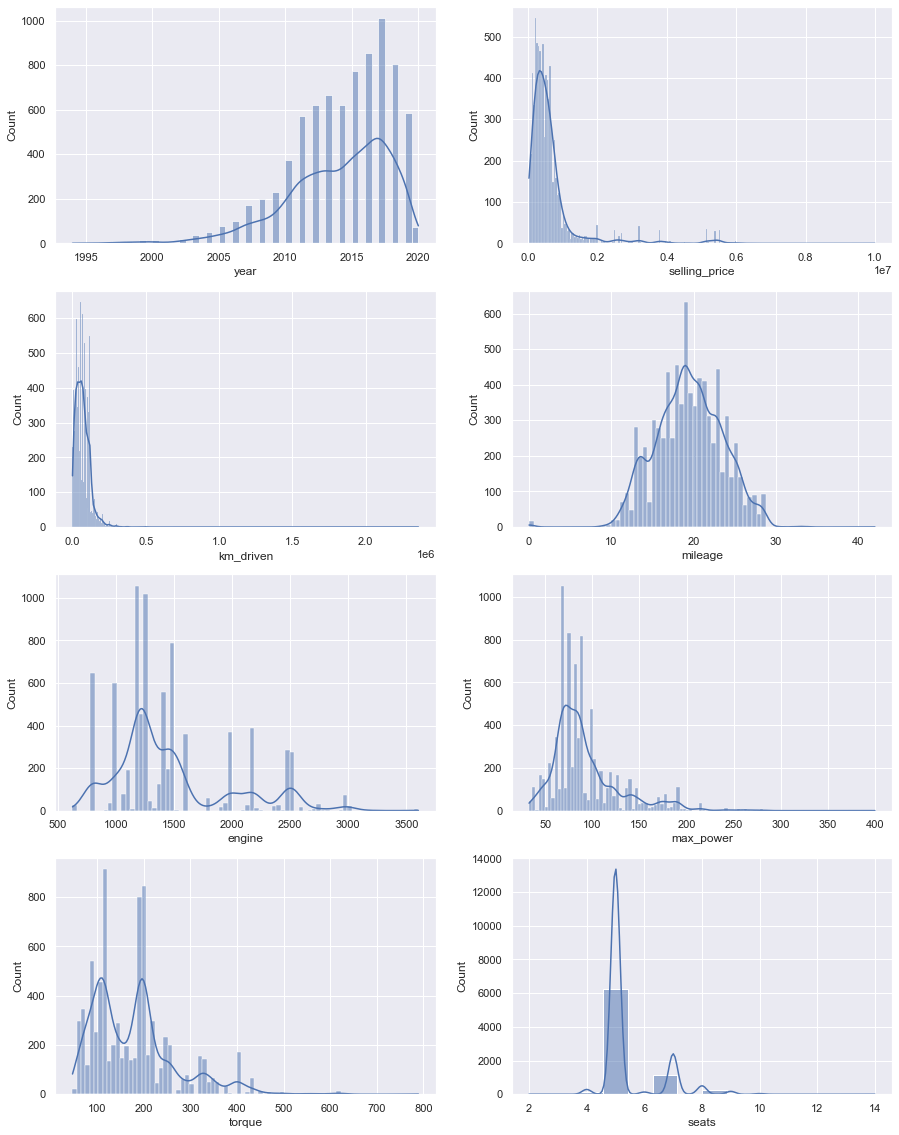

In [16]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(num_cols)):
    plt.subplot(4,2,col+1)
    sns.histplot(x=num_cols[col], data=data, kde=True)

In [17]:
from scipy.stats import boxcox
boxcox_results = boxcox(data['selling_price'])
y_boxcox = boxcox_results[0]
y_lambda = boxcox_results[1]

Text(0.5, 1.0, 'Boxcox Tranformation')

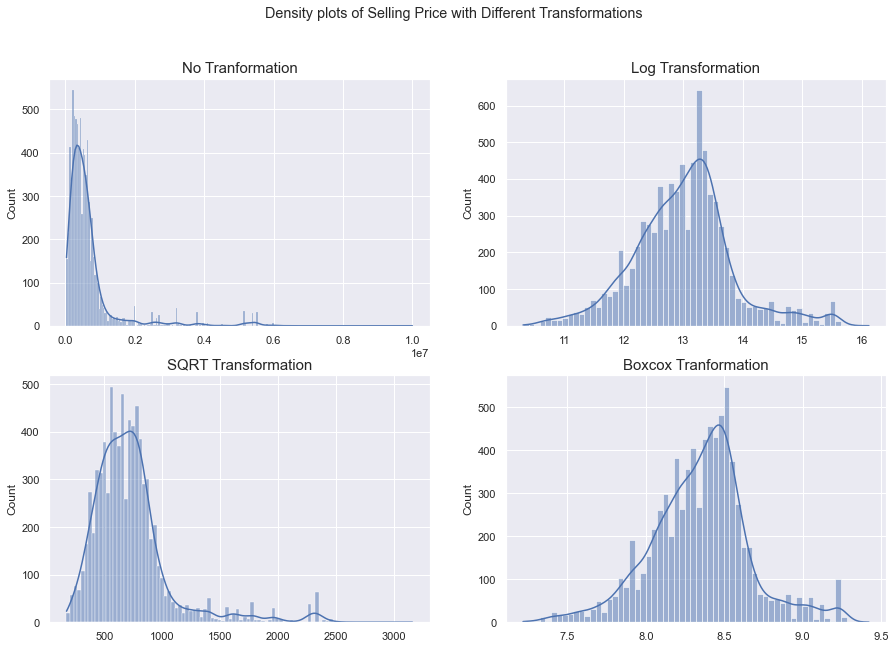

In [18]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('Density plots of Selling Price with Different Transformations')

sns.histplot(ax=axes[0,0], x=data['selling_price'], kde=True).set_xlabel(None)
axes[0,0].set_title('No Tranformation', fontsize=15)
sns.histplot(ax=axes[0,1], x=np.log(data['selling_price']), kde=True).set_xlabel(None)
axes[0,1].set_title('Log Transformation', fontsize=15)
sns.histplot(ax=axes[1,0], x=np.sqrt(data['selling_price']), kde=True).set_xlabel(None)
axes[1,0].set_title('SQRT Transformation', fontsize=15)
sns.histplot(ax=axes[1,1], x=y_boxcox, kde=True)
axes[1,1].set_title('Boxcox Tranformation', fontsize=15)

The above figure shows that we can go with log transformation on our output variable **selling_price**

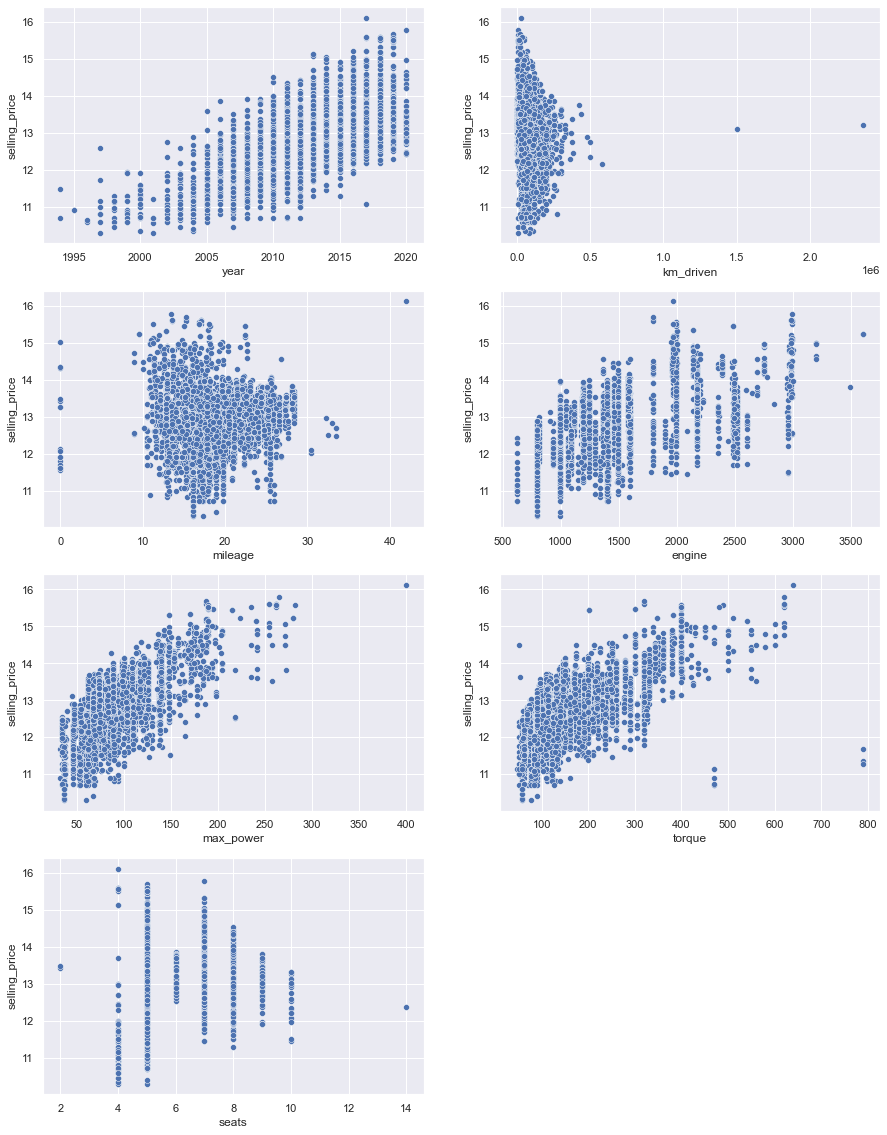

In [19]:
num_cols.remove('selling_price')
fig = plt.figure(figsize=[15, 20])
for col in range(len(num_cols)):
    plt.subplot(4,2,col+1)
    sns.scatterplot(x=num_cols[col], y=np.log(data['selling_price']), data=data)
    

The relationship between **km_driven** and **selling_price** is not visible because of outliers

In [20]:
data.sort_values(by=['km_driven'], ascending=False).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3377,Hyundai,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7,5.0
1757,Mahindra,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,330.0,7.0
3399,Maruti,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.90,1061.0,67.00,84.0,5.0
3528,Maruti,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.0,5.0
6488,Toyota,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.57,200.0,7.0


Here it seems that **km_driven** has two extreme outliers which should be removed

In [21]:
data = data.drop(data[data['km_driven'] > 600000].index).reset_index(drop=True)

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

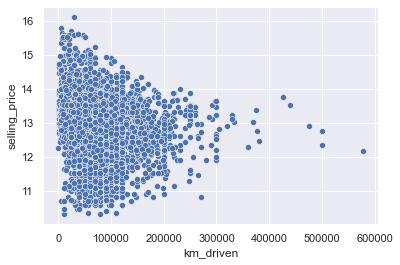

In [22]:
sns.scatterplot(x='km_driven', y=np.log(data['selling_price']), data=data)

The above plot shows very weak relationship between **selling_price** and **km_driven**

In [23]:
data.sort_values(by=['mileage'], ascending=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2290,Hyundai,2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.00,1086.0,62.1,96.1,5.0
4393,Mercedes,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.00,2987.0,165.0,510.0,5.0
6444,Mahindra,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.00,2523.0,70.0,200.0,2.0
2636,Hyundai,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.00,1086.0,62.1,96.1,5.0
7134,Mercedes,2017,3300000,60000,Diesel,Dealer,Automatic,First Owner,0.00,1950.0,194.0,400.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,Maruti,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796.0,47.3,69.0,5.0
7330,Maruti,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.3,60.0,4.0
3788,Maruti,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796.0,40.3,60.0,4.0
33,Maruti,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.3,60.0,4.0


 - **mileage** also have an extreme value and the same row also contains extreme value for **selling_price** also, so it is better to remove this row.
 - Looking from top, there are some values with zeroes, These are missing as mileage cannot be zero, So we can fill these rows with median values as this variable is not normallly distributed

In [24]:
data['mileage'][data['mileage'] == 0].value_counts()

0.0    17
Name: mileage, dtype: int64

In [25]:
data = data.drop(data[data['mileage'] >= 42].index).reset_index(drop=True)
data["mileage"] = np.where(data["mileage"] == 0, np.median(data['mileage']), data['mileage'])

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

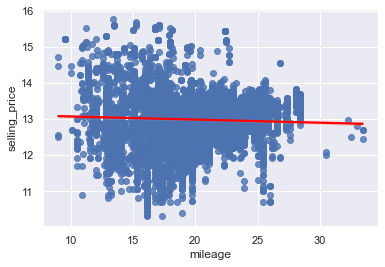

In [26]:
sns.regplot(x='mileage', y=np.log(data['selling_price']), data=data, line_kws={'color': 'red'})

The above plot shows that, the relationship between **mileage** and **selling_price** is very weak.

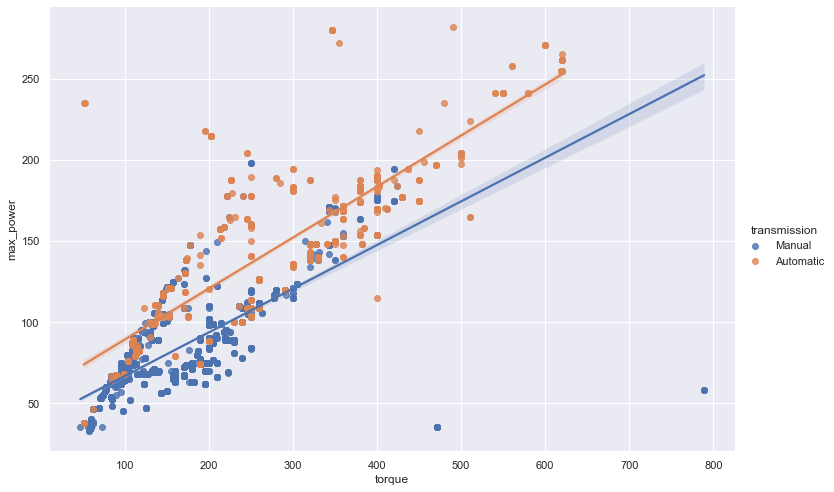

In [27]:
sns.lmplot(y='max_power', x='torque', data=data, hue='transmission', height=7, aspect=1.5)

In [28]:
num_cols.append('selling_price')

<AxesSubplot:>

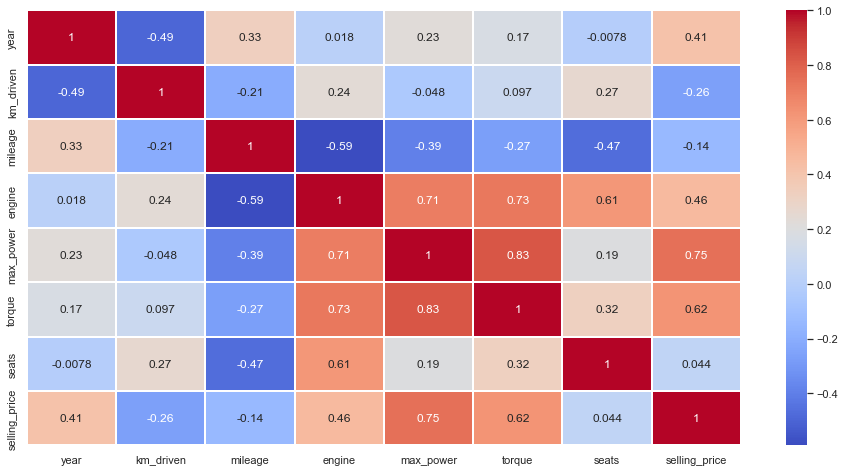

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(data[num_cols].corr(), annot=True, linewidths=2, cmap= 'coolwarm')

The above heatmap shows that the correlation between **torque** and **max_power** is very high, So there is no need to retain both as they both will be showing same effect. So we can drop torque.\
The correlation of **seats** is very weak which can also be dropped.

In [30]:
data = data.drop(['mileage','torque', 'seats'], axis=1)

Let's Explore Categorical variables:

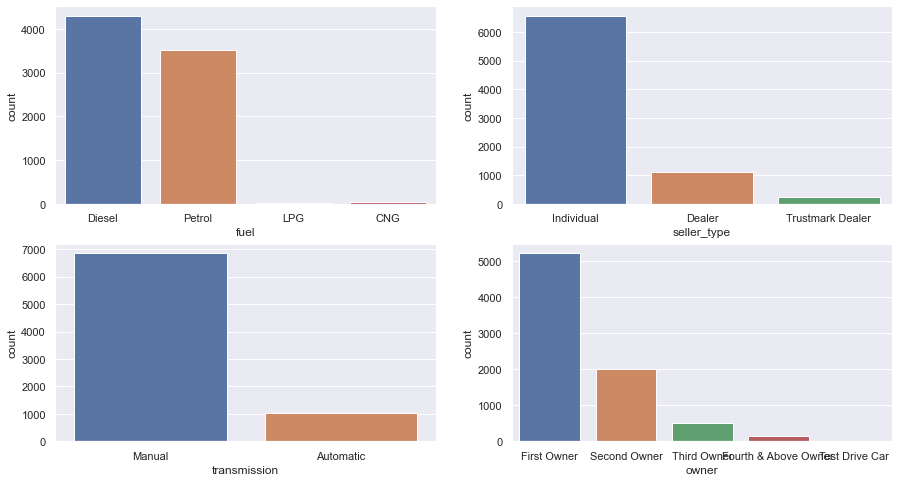

In [31]:
obj_cols.remove('name')
fig = plt.figure(figsize=[15,8])
for col in range(len(obj_cols)):
    plt.subplot(2,2,col+1)
    sns.countplot(x=obj_cols[col], data=data)

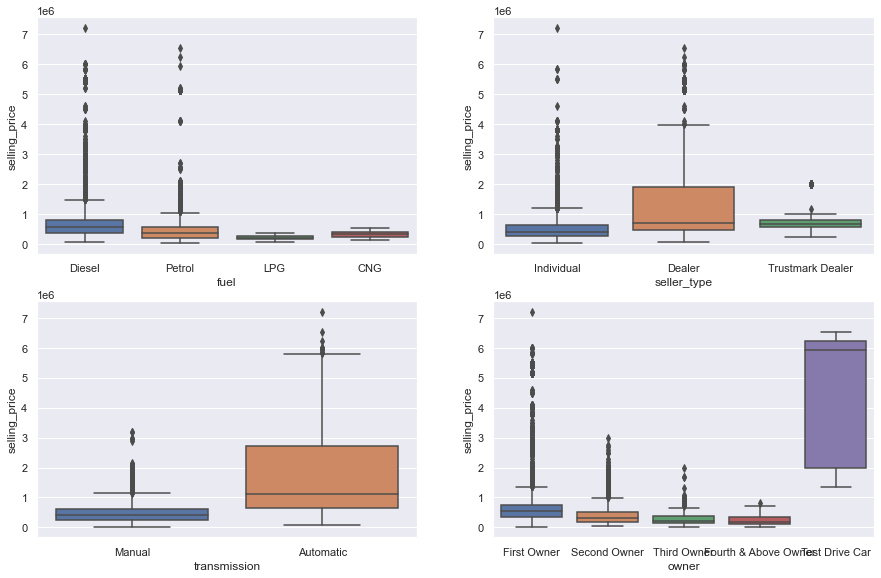

In [32]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(obj_cols)):
    plt.subplot(4,2,col+1)
    sns.boxplot(x=obj_cols[col], y='selling_price', data=data)

Text(0.5, 1.0, 'Car Brands vs Selling Price')

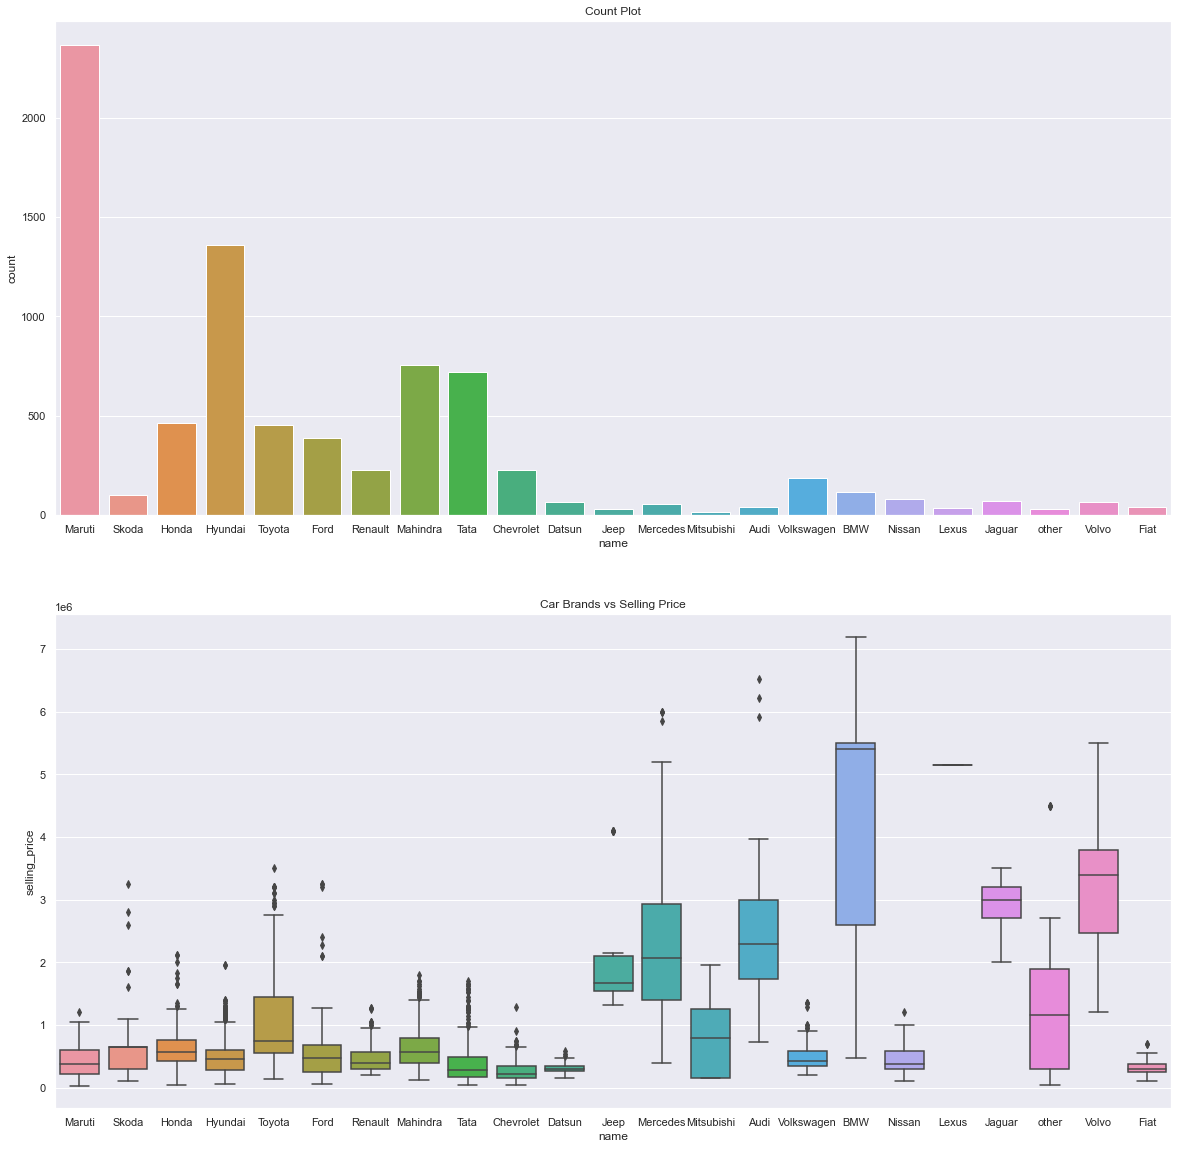

In [33]:
fig, ax = plt.subplots(2,1, figsize=[20, 20])
sns.countplot(ax = ax[0], x='name', data=data).set_title('Count Plot')
sns.boxplot(ax = ax[1], x='name', y='selling_price', data=data).set_title('Car Brands vs Selling Price')

### Building Linear Model

In [34]:
data_dummies = pd.get_dummies(data, drop_first=True)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y = data_dummies['selling_price']
x = data_dummies.drop('selling_price', axis=1)

In [37]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=300)

In [38]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
Scaler = MinMaxScaler()

In [39]:
xTrain_Scaled = Scaler.fit_transform(xTrain)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
Lr = LinearRegression()

In [41]:
yTrain_log = np.log(yTrain)
yTest_log = np.log(yTest)

In [42]:
Lr.fit(xTrain_Scaled, yTrain_log)
Lr.score(xTrain_Scaled, yTrain_log)

0.912544756260065

In [43]:
xTest_Scaled = Scaler.transform(xTest)

In [44]:
yPred = Lr.predict(xTest_Scaled)

In [45]:
r2_score(yPred, yTest_log)

0.9076709163894154

[Text(0.5, 0, 'Predicted values'),
 Text(0, 0.5, 'Obsereved values'),
 Text(0.5, 1.0, 'Obsereved vs Predicted values of Test data')]

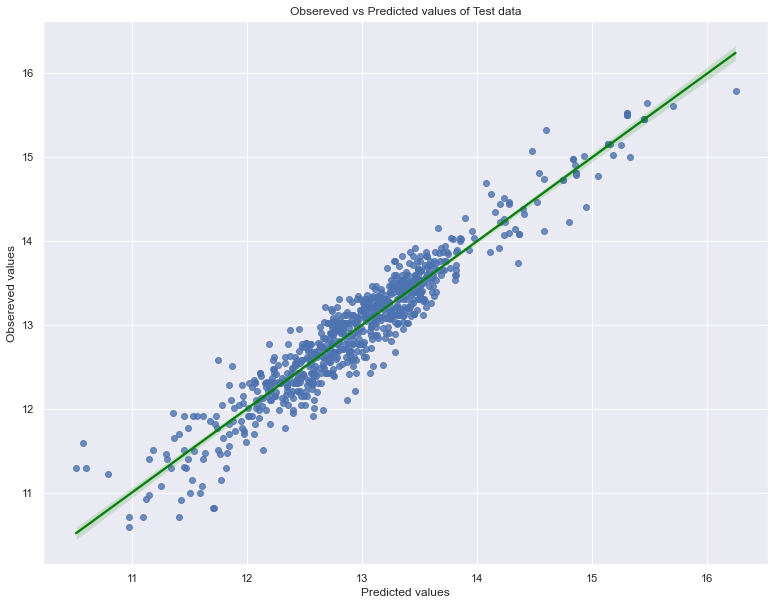

In [46]:
fig = plt.figure(figsize=[13, 10])
ax = sns.regplot(yPred, yTest_log, line_kws={'color': 'green'})
ax.set(xlabel = 'Predicted values', ylabel = 'Obsereved values', title='Obsereved vs Predicted values of Test data')

In [47]:
pd.DataFrame({'Observed': yTest_log, 'Predicted': yPred}).corr()

,Observed,Predicted
Observed,1.00000,0.95654
Predicted,0.95654,1.00000


The correlation between observed and predicted values are almost 96%, which shows that we did a great job here.

In [48]:
mean_squared_error(yPred, yTest_log)

0.05829995781523261

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [50]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2],
    'ridge_regression__alpha': np.geomspace(180, 200, 30)
}

In [51]:
grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(xTrain, yTrain)
grid.best_score_, grid.best_params_

(0.9463410392783255,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 192.16474154711673})

Results shows that the higher order polynomial degree 2 is necessary

In [52]:
yPred = grid.predict(xTest)
r2_score(yTest, yPred)

0.94332997328911

In [53]:
pd.DataFrame({'Observed': yTest, 'Predicted': yPred}).corr()

,Observed,Predicted
Observed,1.000000,0.971828
Predicted,0.971828,1.000000


The correlation between Observed and Predicted values increased by one percent

[Text(0.5, 0, 'Predicted values'),
 Text(0, 0.5, 'Obsereved values'),
 Text(0.5, 1.0, 'Obsereved vs Predicted values of Test data')]

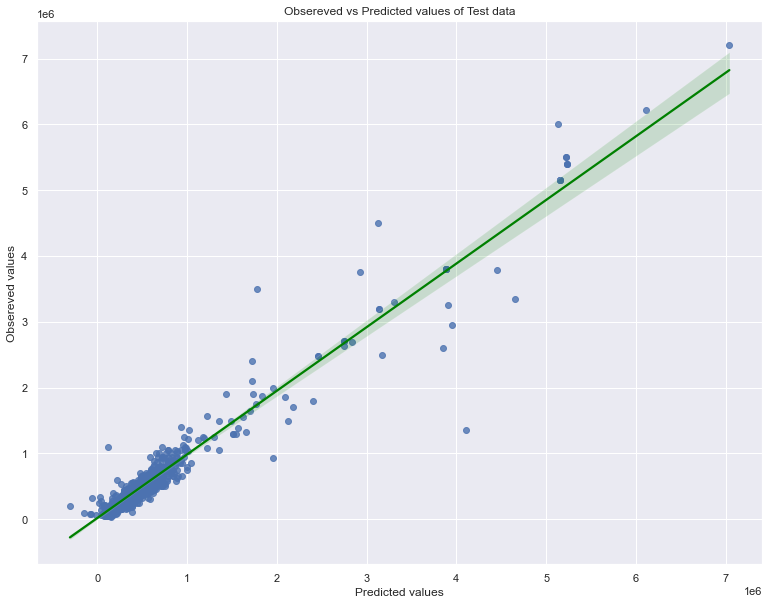

In [54]:
fig = plt.figure(figsize=[13, 10])
ax = sns.regplot(yPred, yTest, line_kws={'color': 'green'})
ax.set(xlabel = 'Predicted values', ylabel = 'Obsereved values', title='Obsereved vs Predicted values of Test data')

In [105]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def StandScaler(df):
    col_names = df.columns.values.tolist()
    Scaler = StandardScaler()
    output_df = pd.DataFrame(Scaler.fit_transform(df))
    output_df.columns = col_names
    return output_df

def PolyFeatures(df,power):

    pf = PolynomialFeatures(power)
    output_nparray = pf.fit_transform(df)
    powers_nparray = pf.powers_

    col_names = list(df.columns)
    target_col_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(col_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = col_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_col_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_col_names)
    return output_df

In [106]:
xTrain_pf = PolyFeatures(xTrain,2)

In [107]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pf = PolynomialFeatures(2)
Scaler = StandardScaler()


In [108]:
xTrain_Scaled = Scaler.fit_transform(xTrain)

In [ ]:
xTrain_Scaled.n